# Plot data

In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
import pandas as pd

from parameters import Ts

# Plot radical thermochemical data

In [ ]:
radical_data_df = pd.read_csv("../data/radical.csv")
radical_data_df

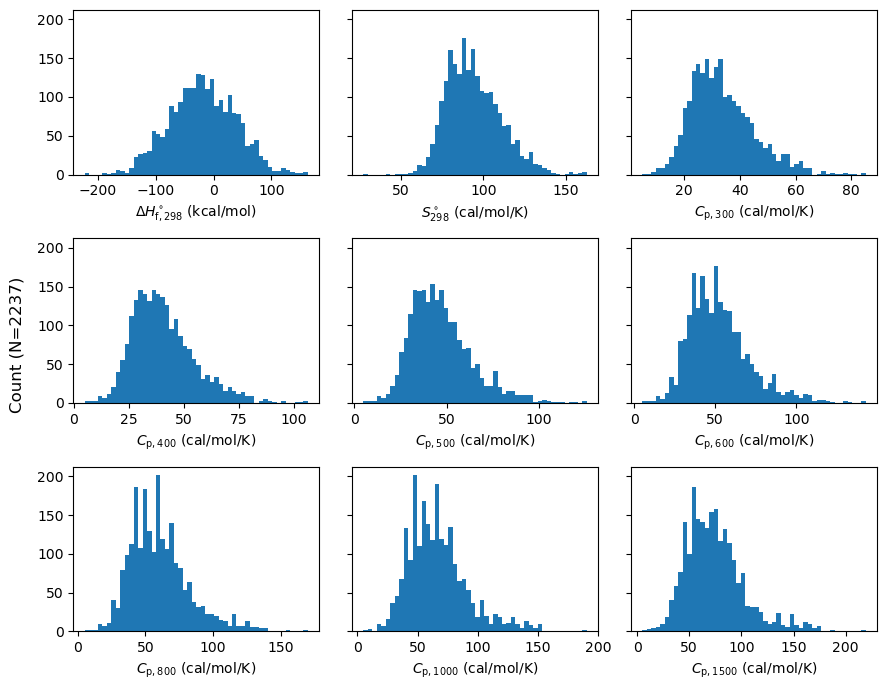

In [37]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(9, 7))
ax = axs.flat[0]
ax.hist(radical_data_df["H298 (kcal/mol)"], bins=50)
ax.set_xlabel("$\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)")

ax = axs.flat[1]
ax.hist(radical_data_df["S298 (cal/mol/K)"], bins=50)
ax.set_xlabel("$S^\circ_\mathrm{298}$ (cal/mol/K)")

for ax, T in zip(axs.flat[2:], Ts):
    ax.hist(radical_data_df[f"Cp{T} (cal/mol/K)"], bins=50)
    ax.set_xlabel("$C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)")

fig.supylabel(f"Count (N={len(radical_data_df.index)})")
fig.tight_layout()
fig.savefig("figures/data_radical_hist.pdf", bbox_inches="tight")

# Plot number of equivalent resonances

In [ ]:
radical_data_df = pd.read_csv("../data/radical.csv")
radical_data_df

In [ ]:
plt.figure()
count_dict = radical_data_df["num_resonance"].value_counts()
plt.bar(count_dict.index, count_dict)
plt.ylabel(f"Count (N={len(radical_data_df.index)})")
plt.xlabel("Number of equivalent resonances")
plt.savefig("figures/data_num_resonances.pdf", bbox_inches="tight")

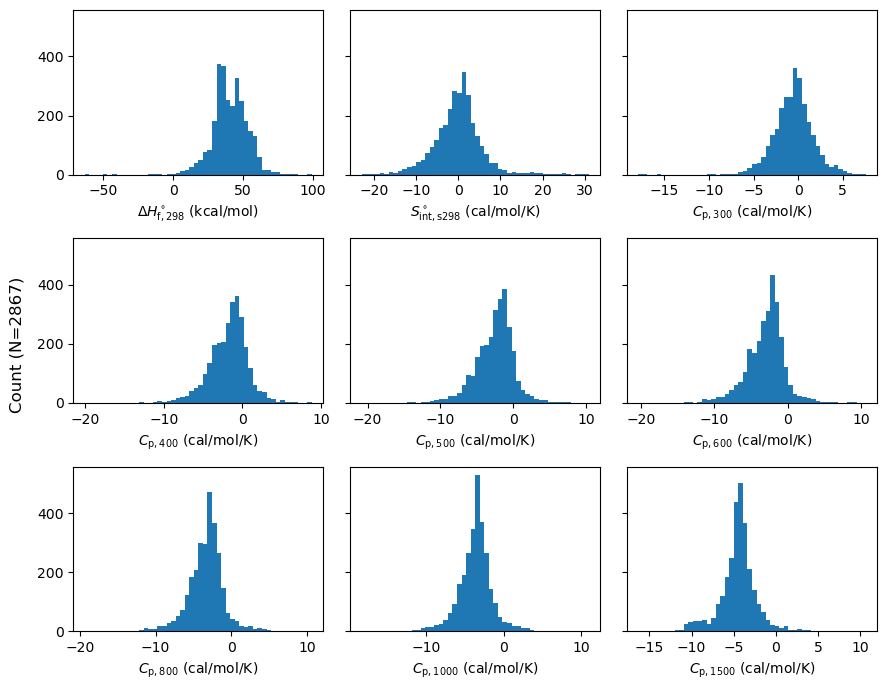

In [46]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(9, 7))
ax = axs.flat[0]
ax.hist(HBI_correction_df["HBI_H298 (kcal/mol)"], bins=50)
ax.set_xlabel("$\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)")

ax = axs.flat[1]
ax.hist(HBI_correction_df["HBI_Sint298 (cal/mol/K)"], bins=50)
ax.set_xlabel("$S^\circ_\mathrm{int,s298}$ (cal/mol/K)")

for ax, T in zip(axs.flat[2:], Ts):
    ax.hist(HBI_correction_df[f"HBI_Cp{T} (cal/mol/K)"], bins=50)
    ax.set_xlabel("$C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)")

fig.supylabel(f'Count (N={len(HBI_correction_df.index)})')
fig.tight_layout()
fig.savefig(f"figures/data_hbi_hist.pdf", bbox_inches="tight")

In [47]:
HBI_correction_df.sort_values("HBI_H298 (kcal/mol)")

,radical_smiles,radical_resonance_smiles,closed_shell_smiles,closed_shell_H298 (kcal/mol),closed_shell_S298 (cal/mol/K),closed_shell_Cp300 (cal/mol/K),closed_shell_Cp400 (cal/mol/K),closed_shell_Cp500 (cal/mol/K),closed_shell_Cp600 (cal/mol/K),closed_shell_Cp800 (cal/mol/K),...,radical_Cp1500 (cal/mol/K),HBI_H298 (kcal/mol),HBI_Sint298 (cal/mol/K),HBI_Cp300 (cal/mol/K),HBI_Cp400 (cal/mol/K),HBI_Cp500 (cal/mol/K),HBI_Cp600 (cal/mol/K),HBI_Cp800 (cal/mol/K),HBI_Cp1000 (cal/mol/K),HBI_Cp1500 (cal/mol/K)
2250,C=C1[CH]CCC1,C=C1[CH]CCC1,C=C1CCCC1,97.577080,74.999929,24.808869,32.099562,38.524357,44.025738,52.674635,...,71.802469,-63.392919,-0.056462,0.124326,0.940182,1.573943,1.935277,2.588503,3.216473,4.412796
2453,C=C1C[CH]CC1,C=C1C[CH]CC1,C=C1CCCC1,97.577080,74.999929,24.808869,32.099562,38.524357,44.025738,52.674635,...,71.879624,-48.785218,1.771508,0.857553,1.270404,1.675966,2.062543,2.771104,3.385802,4.489950
2163,O=C1[C]=COO1,[O]C1=C=COO1,OC1=C=COO1,70.746421,71.898610,22.019311,27.231504,30.084147,31.972310,35.113271,...,34.649349,-42.316740,-0.728467,-4.647030,-6.088422,-5.853149,-5.382810,-5.131778,-5.097943,-4.698661
2728,CC=C1[C]=COO1,C[CH]C1=C=COO1,CCC1=C=COO1,93.433400,84.899131,26.939770,34.639630,40.081680,44.369270,51.436770,...,58.231940,-16.354425,-3.727705,-1.674045,-3.324139,-3.506491,-3.476475,-4.180920,-4.681451,-4.498040
2599,[C]1=COC=C1,C1=C[CH]OC=1,C1=CCOC=1,74.300589,61.241898,18.877609,25.103244,29.588965,32.674299,36.861416,...,38.135938,-13.642491,4.967666,-3.920910,-5.562588,-6.091117,-6.121722,-5.907441,-6.149336,-6.164252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844,[C]#CC,[C]#CC,C#CC,44.502604,59.047790,14.281583,16.945367,19.314250,21.396433,24.816592,...,27.301036,82.840707,4.837282,-0.969649,-1.567865,-1.953792,-2.296617,-2.877374,-3.347086,-4.211075
327,[O]C1OOC(=O)O1,[O]C1OOC(=O)O1,O=C1OOC(O)O1,-171.716348,79.173021,19.028795,26.330956,31.955793,35.879847,41.374302,...,40.733076,84.872426,-0.507149,2.053741,-0.672630,-2.877060,-4.207452,-5.852402,-6.614926,-6.511780
966,C=[C]OCOOC(C)=O,C=[C]OCOOC(C)=O,C=COCOOC(C)=O,-126.388317,98.856180,39.364130,52.613671,61.833021,67.829751,75.473117,...,76.847398,87.261985,11.890229,0.311144,-6.578733,-10.128803,-11.274851,-11.305129,-10.629413,-9.618415
1988,OC1=C2[CH]OC1OOC2,O[C]1C2=COC1OOC2,OC1C2=COC1OOC2,-81.562146,81.215793,29.921257,40.340507,48.434570,53.772554,62.049786,...,70.122504,99.384589,4.613113,1.396276,-0.367913,-1.708534,-1.998077,-2.826983,-3.965360,-2.371940
